# 03. 예측 도구

이 장에서는, 다양한 예측 상황에서 사용할 수 있는 일반적이면서 좋은 도구 몇 가지를 다룹니다. 변환과 조정으로 예측 작업을 단순하게 만드는 방법, 예측 기법에서 이용 가능한 정보를 적절하게 사용했는지 확인하는 기법, 그리고 예측구간(prediction interval)을 계산하는 기법 등의 예측 기법을 벤치마크하는 방법을 살펴볼 것입니다.

이 책의 나머지 뒷 부분에서 다양한 예측 기법을 다룰 때 이 장에서 다룬 각각의 도구를 반복하여 사용할 것입니다.

<br>

## 03.01. 몇 가지 단순한 예측 기법

<br>

### 평균 기법

이 경우에서는, 예측한 모든 미래 값은 과거 데이터의 평균과 같습니다. 과거 데이터를 $y_{1},\dots,y_{T}$ 라고 쓴다면, 예측값을 다음과 같이 쓸 수 있습니다.

$\hat{y}_{T+h|T} = \bar{y} = (y_{1}+\dots+y_{T})/T.$

$\hat{y}_{T+h|T}$은 데이터 $y_{1},\dots,y_{T}$로 $y_{T+h}$를 추정한 것을 단순하게 쓴 것

<br>

#### `meanf(y, h)`
* `y` : 시계열
* `h` : 예측 범위

<br>

### 단순 기법 

단순 기법(naïve method)에서는 모든 예측값을 단순하게 마지막 값으로 둡니다. 즉,

$\hat{y}_{T+h|T} = y_{T}.$

이 기법은 다양한 경제 금융 시계열을 다룰 때 상당히 잘 들어맞습니다.

<br>

#### `naive(y, h)`
#### `rwf(y, h)`
* `y` : 시계열
* `h` : 예측 범위


데이터가 확률보행(random walk) 패턴을 따를 때는 단순 기법(naïve method)이 최적이라서( 8.1 절을 참조.), 확률보행 예측값(random walk forecasts)이라고 부르기도 합니다.

<br>

### 계절성 단순 기법(Seasonal naïve method)

계절성이 아주 뚜렷한 데이터를 다룰 때 비슷한 기법이 유용합니다. 이 경우에는, **각 예측값을 연도의 같은 계절의(예를 들면, 이전 연도의 같은 달) 마지막 관측값으로 둡니다** $T+h$ 에 대한 예측을 식으로 쓰면,

$\hat{y}_{T+h|T} = y_{T+h-m(k+1)},$

$m$은 계절성의 주기(seasonal period),$k=\lfloor (h-1)/m\rfloor+1$은 $u$의 정수 부분을 나타냅니다. 

**예를 들면, 월별 데이터에서 미래의 모든 2월 값들의 예측값이 마지막으로 관측한 2월 값과 같습니다.** 분기별 데이터에서, 미래의 모든 2분기 값의 예측치가 마지막으로 관측한 2분기 값과 같습니다. 다른 달과 분기, 다른 계절성 주기에 대해 같은 방식으로 적용할 수 있습니다.

<br>

#### `snaive(y, h)`
* `y` : 시계열
* `h` : 예측 범위

<br>

### 표류 기법

**단순 기법(naïve method)을 수정하여 예측값이 시간에 따라 증가하거나 감소하게 할 수 있습니다.** 여기에서 (표류(drift)라고 부르는) 시간에 따른 변화량을 과거 데이터에 나타나는 평균 변화량으로 정합니다. 그러면  $T+h$  시간에 대한 예측값은 다음과 같이 주어집니다.

$$\hat{y}_{T+h|T} = y_{T} + \frac{h}{T-1}\sum_{t=2}^T (y_{t}-y_{t-1}) = y_{T} + h \left( \frac{y_{T} -y_{1}}{T-1}\right).$$

**처음과 마지막 관측값에 선을 긋고 이 선을 미래로 외삽(extrapolation)한 것과 같습니다.**

<br>

#### `rwf(y, h, drift=TRUE)`
* `y` : 시계열
* `h` : 예측 범위

<br>

### 예제

In [4]:
library(fpp)
library(fpp2)
library(fpp3)

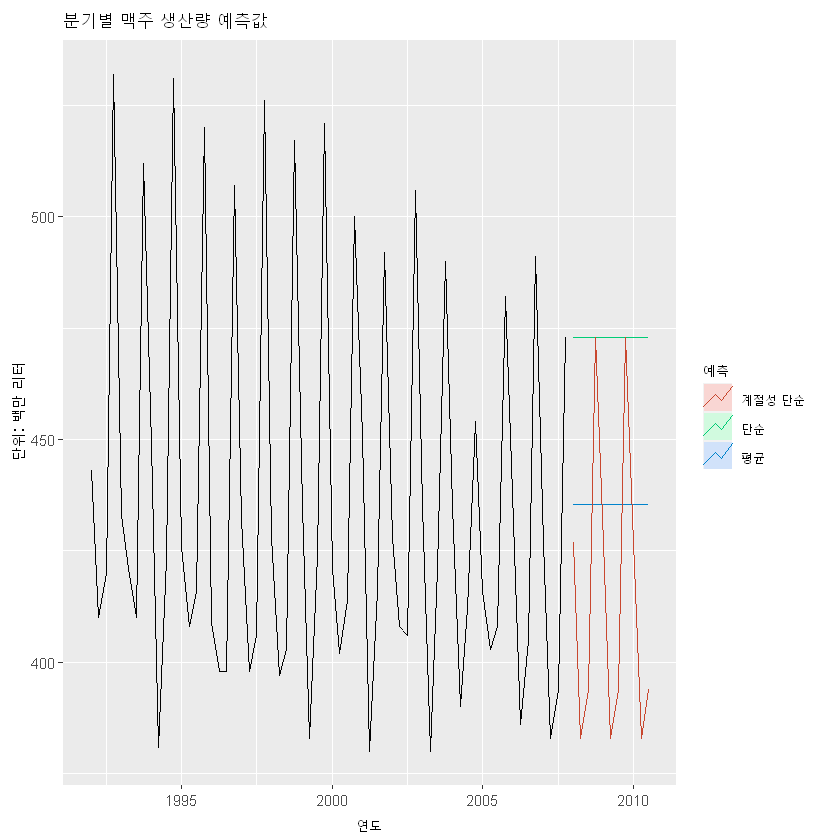

In [5]:
beer2 <- window(ausbeer,start=1992,end=c(2007,4))

autoplot(beer2) +
  autolayer(meanf(beer2, h=11),
    series="평균", PI=FALSE) +
  autolayer(naive(beer2, h=11),
    series="단순", PI=FALSE) +
  autolayer(snaive(beer2, h=11),
    series="계절성 단순", PI=FALSE) +
  ggtitle("분기별 맥주 생산량 예측값") +
  xlab("연도") + ylab("단위: 백만 리터") +
  guides(colour=guide_legend(title="예측"))

<br>

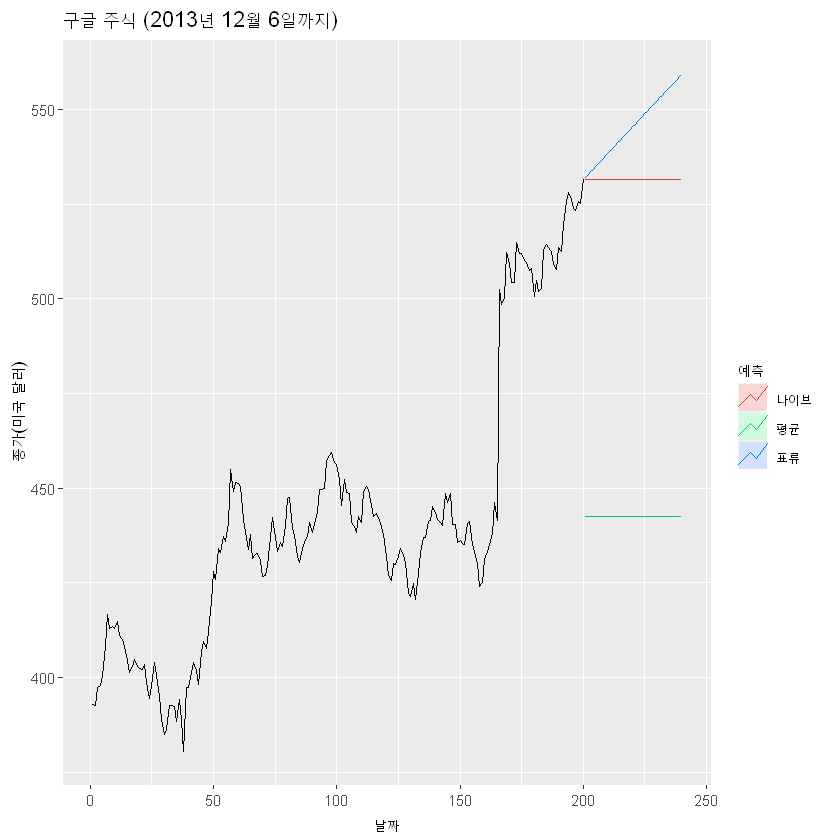

In [6]:
autoplot(goog200) +
  autolayer(meanf(goog200, h=40),
    series="평균", PI=FALSE) +
  autolayer(rwf(goog200, h=40),
    series="나이브", PI=FALSE) +
  autolayer(rwf(goog200, drift=TRUE, h=40),
    series="표류", PI=FALSE) +
  ggtitle("구글 주식 (2013년 12월 6일까지)") +
  xlab("날짜") + ylab("종가(미국 달러)") +
  guides(colour=guide_legend(title="예측"))


때때로 이런 단순한 기법 중의 하나가 사용할 수 있는 가장 좋은 예측 기법이 될 수 있습니다. **하지만, 많은 경우에, 이러한 기법은 선택한 기법보다는 벤치마크 역할을 할 것입니다.** 즉, 새로운 기법이 이런 단순한 기법보다 좋은지 확인하기 위해, 우리가 다룰 모든 예측 기법을 이런 단순한 기법과 비교할 것입니다. 그렇지 않으면, 그 새로운 기법은 고려하지 않는 것이 낫습니다.

<br>

## 03.02. 변환과 조정

과거 데이터를 조정하면 종종 예측 작업이 더 쉬워집니다. **여기에서는 달력 조정, 인구 조정, 인플레이션 조정, 수학적 변환 등 이렇게 4종류의 조정 방식을 다룹니다.**

**이러한 변환과 조정 방식을 사용하는 목적은 변동의 알려진 원인을 제거하거나 전체 데이터 모음에 걸친 패턴을 더 일관성 있게 만들어서 과거 데이터에 나타나는 패턴을 단순하게 만드는 것입니다.**

<br>

### 달력 조정

계절성 데이터에 나타나는 어떤 변동은 단순히 달력 때문일 수 있습니다. 이런 경우에는, 예측 모델을 맞추기 전에, 변동을 제거하면 보통 훨씬 쉬워집니다. `monthdays()`함수로 각 월과 각 분기의 날짜를 계산할 수 있습니다.

예를 들어, 여러분이 농장의 월별 우유 생산량 데이터를 다루고 있다면, 한 연도에서 단순히 각 월의 날짜 개수가 다른 것 때문에 월별 차이가 있을 것입니다.

In [7]:
milk %>% head
monthdays(milk) %>% head

,Jan,Feb,Mar,Apr,May,Jun
1962,589,561,640,656,727,697


,Jan,Feb,Mar,Apr,May,Jun
1962,31,28,31,30,31,30


In [8]:
dframe <- cbind(Monthly = milk,
                DailyAverage = milk/monthdays(milk))
dframe %>% head

,Monthly,DailyAverage
Jan 1962,589,19.00000
Feb 1962,561,20.03571
Mar 1962,640,20.64516
Apr 1962,656,21.86667
May 1962,727,23.45161
Jun 1962,697,23.23333


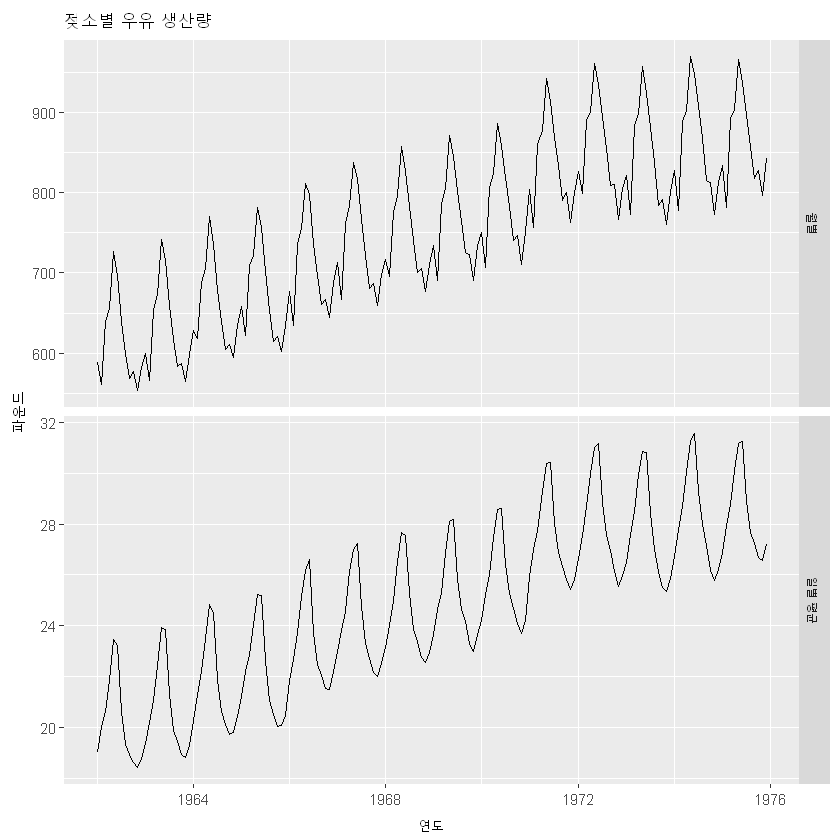

In [9]:
colnames(dframe) <- c("월별", "일별 평균")
autoplot(dframe, facet = TRUE) +
xlab("연도") + ylab("파운드") +
ggtitle("젖소별 우유 생산량")

일별 평균 생산량 그래프에 나타난 계절성 패턴이 얼마나 더 단순한지 월별 총 생산량 그래프와 비교하여 살펴보시길 바랍니다. **월별 총 생산량 대신에 일별 평균 생산량을 보고, 월 길이가 달라서 생기는 변동을 효과적으로 제거하였습니다.** **보통 더 단순한 패턴이 모델링 작업을 더 쉽게 만들고 더 정확한 예측치를 주도록 합니다.**

<br>

### 인구 조정 

**인구 변화에 영향을 받는 데이터를 1명당 데이터로 조정할 수 있습니다. 즉, 전체 대신에 1명당 데이터(또는 천명, 백만명)를 고려하는 것입니다.** 

예를 들어, 어떤 특정 지역에서 시간에 따른 병원 침상 개수를 다루고 있다고 합시다. 여러분이 천명당 침상수를 고려하여 인구 변화 효과를 제거하면, 결과를 해석하기가 훨씬 더 쉬워집니다. 그러면 침상 수가 정말로 증가했는지 여부나 증가량이 완전히 인구 증가에 따른 자연스러운 현상인지 여부를 확인할 수 있습니다. 전체 침상 수는 증가하지만 천명당 침상수는 감소할 수 있습니다. 인구가 병원 침상수보다 빠르게 증가하면 이런 현상이 나타납니다. **인구 변화에 영향을 받는 대부분의 데이터에서 전체보다 1명당 데이터를 다루는 것이 좋습니다.**

<br>

### 인플레이션 조정

**돈의 가치에 영향을 받는 데이터는 모델링에 앞서 적절하게 조정되어야 합니다.** 예를 들면, 인플레이션 때문에 이전 몇 십년 동안 새로운 집의 평균 가격이 증가했을 것입니다. 올해 $\$$200,000 가격의 집은 20년 전 $\$$200,000 가격의 집과 같지 않습니다. 이러한 이유에서, 보통은 모든 값을 특정 연도의 달러 가치로 나타내도록 금융 시계열을 조정합니다. 예를 들면, 주택 가격 데이터는 2000년대의 달러로 나타낼 수 있습니다.

**이렇게 조정하기 위해, 가격 지수를 사용합니다. $y_z$ 가 가격 지수를 나타내고 $y_t$ 가 연도 $t$의 원래의 주택 가격을 나타낸다고 하면,  $x_{t} = y_{t}/z_{t} * z_{2000}$는 2000년대 달러 가치로 주택 가격을 조정한 결과를 나타냅니다. 종종 정부 기관에서 가격 지수를 만듭니다. 소비재에 대해, 보통 가격 지수는 소비자 가격 지수(또는 CPI)입니다.**

<br>

### 수학적 변환

데이터에서 시계열의 수준에 비례하여 증가하거나 감소하는 변동이 보이면, 변환(transformation)이 유용할 수 있습니다. 

#### 로그 변환

로그 변환(log transformation)은 종종 유용합니다. 원본 관측값과 변환된 관측값을 각각 $y_{1},\dots,y_{T}$와, $w_{1},\dots,w_{T}$로 쓰면, $w_t = \log(y_t)$입니다. 

로그 값으로 바뀐 것은 원래의 눈금에 대해 상대적으로 (또는 비례하게) 바뀐 것이라서, 로그를 사용하면 의미를 해석하기 좋아서 유용합니다. 로그의 밑을 10으로 사용하면, 로그 눈금에서 1만큼 증가하는 것이 원래의 눈금에서 10배 증가한 것과 대응됩니다. **로그 변환의 또 다른 장점은 원래의 눈금에 대해 예측치를 그대로 양수로 놓는다는 것입니다.**

<br>

#### 거듭곱 변환

때때로 (사용했을 때 그렇게 의미를 해석하기 쉽지는 않지만) 다른 변환도 사용합니다. 예를 들면, 제곱근과 세제곱근을 사용할 수 있습니다. 이러한 것들을 이러한 형식 $w_{t} = y_{t}^p$으로 쓸 수 있어서 **거듭곱 변환(power transformation)이라고 합니다.**

<br>

#### 박스-칵스(Box-Cox) 변환

로그 변환(log transformation)과 거듭곱 변환(power transformation) 둘 다 포함하는 유용한 변환은 박스-칵스(Box-Cox) 변환의 일종입니다. 박스-칵스(Box-Cox) 변환은 매개변수 $\lambda$에 따라 달라지고 다음과 같이 정의됩니다.


$w_t  =
    \begin{cases}
      \log(y_t) & \text{$\lambda=0$ 인 경우};  \\
      (y_t^\lambda-1)/\lambda & \text{이외의 경우}.
    \end{cases}$


박스-칵스(Box-Cox) 변환에서 로그는 항상 자연 로그입니다(즉, 밑이 $e$). **그래서  $\lambda$=0이면, 자연 로그를 사용합니다**

**$\lambda$≠0 이면, 어떤 단순한 눈금에 따라 거듭곱 변환(power transformation)을 사용합니다.**

$\lambda = 1$이면, $w_t = y_t - 1$이라, 변환된 데이터에서 시계열의 모양 변화 없이 아래쪽으로 이동하게 됩니다. 하지만, 모든 다른  $\lambda$값에 대해서는, 시계열의 모양이 변할 것입니다.

**좋은 $\lambda$값은 계절성 변동의 크기를 대략적으로 전체 시계열에서 나타나는 계절성 변동의 크기와 비슷하게 만듭니다. 그리고 예측 모델을 더 단순하게 만듭니다.** 이 경우에, 0과 0.5사이의 $\lambda$값이 $\lambda=$0.30와 비교했을 때 비슷한 결과를 주긴 하지만,$\lambda$=
0.30결과가 꽤 괜찮습니다.

<br>

#### `BoxCox.lambda()` : 최적의 $\lambda$ 탐색

[1] 0.2654076

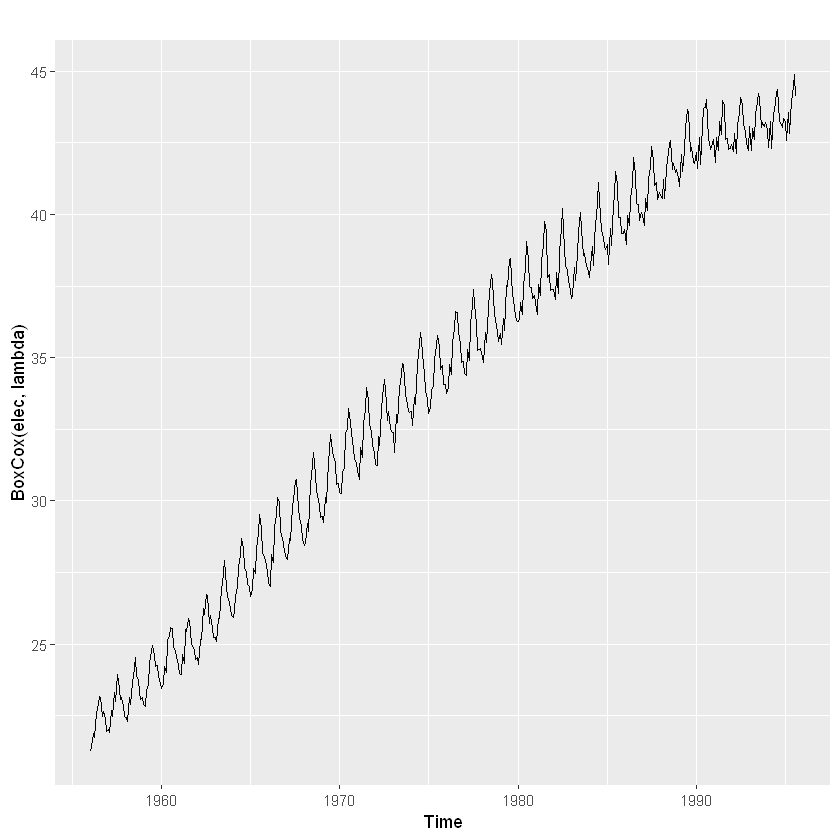

In [10]:
(lambda <- BoxCox.lambda(elec))

autoplot(BoxCox(elec,lambda))

변환을 선택하고나면, 변환된 데이터를 예측해야 합니다. 그리고, 원래의 눈금에 대한 예측치를 얻기 위해 변환을 되돌릴 (또는 역-변환(back transformation)) 필요가 있습니다. 역 박스-칵스(Box-Cox) 변환은 다음과 같이 주어집니다.

$$\begin{equation}
\
  y_{t} =
    \begin{cases}
      \exp(w_{t}) & \text{$\lambda=0$인 경우};\\
      (\lambda w_t+1)^{1/\lambda} & \text{이외의 경우}.
    \end{cases}
\end{equation}$$

<br>

### 거듭곱 변환의 특징
- 어떤 $y_{t} \le 0$에서는 모든 관측값에 어떤 상수를 더해서 조정하지 않으면 거듭곱 변환을 사용할 수 없습니다.
- 단순한 $\lambda$값을 선택하시길 바랍니다. 그러면 설명하기 더 쉬워집니다.
- 예측 결과가 상대적으로 $\lambda$값에 따라 민감하게 변하지는 않습니다.
- 종종 변환이 필요 없을 수 있습니다.
- 변환해도 예측값에는 때때로 거의 차이가 없지만, 예측구간(prediction interval)에는 커다란 영향을 줍니다.

<br>

### 편향조정

**박스-칵스(Box-Cox) 변환 같은 수학적인 변환을 사용할 때 한 가지 문제가 있는데 그것은 역-변환된 점예측값(point forecast)이 예측 분포의 평균이 되지 않는 것입니다.**

**보통은 (변환된 공간에서 분포가 대칭이라고 가정할 때) 예측 분포(forecast distribution)의 중간값(median)이 될 것입니다.** 여러 가지 목적에서, 중간값도 괜찮긴 합니다만, 종종 평균 예측값이 필요하기도 합니다. 

**예를 들면, 한 나라 전체에 대한 예측값을 내기 위해 다양한 지역들의 판매량 예측값을 더하고 싶을 수 있습니다. 평균은 합산 과정이지만, 중간값(median)은 그렇지 않습니다.**

**박스-칵스(Box-Cox) 변환에 대해, 역 변환된 평균은 다음과 같이 주어집니다.**

$$\begin{equation}
\
y_t =
  \begin{cases}
     \exp(w_t)\left[1 + \frac{\sigma_h^2}{2}\right] & \text{$\lambda=0$인 경우;}\\
     (\lambda w_t+1)^{1/\lambda}\left[1 + \frac{\sigma_h^2(1-\lambda)}{2(\lambda w_t+1)^{2}}\right] & \text{이외의 경우;}
  \end{cases}
\end{equation}$$

여기에서  $\sigma_h^2$는 $h-$단계 예측 분산입니다. 예측분산(forecast variance)이 클 수록, 평균과 중간값(median)의 차이가 큽니다.

**(3.1)로 주어진 단순하게 역-변환된 예측값과 (3.2)로 주어진 평균 사이의 차이를 편향(bias)이라고 부릅니다.** 

**중간값 대신 평균을 사용할 때, 점 예측치들이 편향-조정(bias-adjustment)되었다고 말합니다.**

이러한 편향-조정(bias-adjustment)이 얼마나 큰 차이를 만드는지 확인하기 위해, 다음의 예제를 살펴보겠습니다. 여기에서는 로그 변환된  
$(\lambda=0)$ 표류 기법(drift method)을 사용하여 달걀의 연간 평균 가격을 예측하겠습니다. 이 경우에 로그 변환(log transform)은 예측값과 예측 구간이 반드시 양수가 되도록 하는데 쓸모가 있습니다.

In [11]:
eggs %>% head()

A Time Series:
[1] 276.79 315.42 314.87 321.25 314.54 317.92

* 중간값 대신에 평균 예측값이 필요하다면, 박스-칵스(Box-Cox) 변환 매개변수 중에서 `biasadj=TRUE`를 사용

In [12]:
fc <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80)
fc2 <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80, biasadj=TRUE)

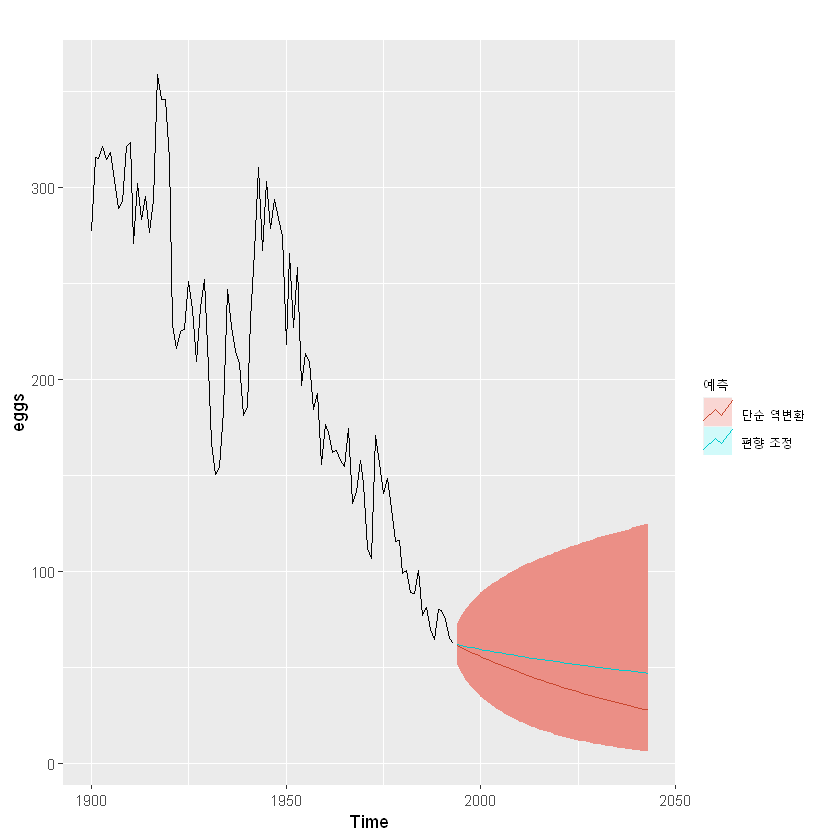

In [13]:
autoplot(eggs) +
  autolayer(fc, series="단순 역변환", PI=T) +
  autolayer(fc2, series="편향 조정", PI=F) +
  guides(colour=guide_legend(title="예측"))

그림 3.4의 파란색 선은 예측 중간값을 나타내고 빨간색 선은 예측 평균값을 나타냅니다. 편향 조정을 사용할 때 한 쪽으로 쏠린 예측 분포가 점 예측치를 어떻게 끌어올리는지 주목하시길 바랍니다.

forecast 패키지에서는 편향 조정을 사용하지 않는 것이 기본값입니다. 

<br>

## 03.03. 잔차 진단

<br>

### 적합값

시계열에서 각 관측값은 이전의 모든 관측치를 이용하여 예측될 수 있습니다. 이러한 것을 적합값(fitted values)이라고 부르고, 관측값 $y_{1},\dots,y_{t-1}$을 가지고 하는 $y_t$ 의 예측값이라는 의미에서 라고 씁니다. 이런 표기법을 매우 자주 사용할 것입니다. 종종 아래첨자를 생략하고  $\hat{y}_{t|t-1}$  대신에 $\hat{y_t}$ 로 쓰기도 할 것입니다. 적합값은 항상 한 단계 예측치를 포함합니다.

사실, **미래 관측값을 포함하여 사용할 수 있는 모든 관측값으로 예측 기법에 들어가는 매개변수를 추정했기 때문에 적합값(fitted value)은 종종 진짜 예측값은 아닙니다**. 예를 들어, 평균 기법을 사용한다고 하면, 적합값(fitted value)은 다음과 같이 주어집니다.

$$\hat{y}_t = \hat{c}$$

**여기에서  $\hat{c}$는 시간 이후의 관측값을 포함하여 이용할 수 있는 모든 관측값에 대해 계산한 평균값입니다.** 비슷하게, 표류 기법(drift method)에서는, 사용할 수 있는 모든 관측값을 가지고 표류 매개변수(drift parameter)를 추정합니다. 이 경우에, 적합값(fitted value)은 다음과 같이 주어집니다.

$$\hat{y}_t = y_{t-1} + \hat{c}$$

여기에서  $\hat{c} = (y_T-y_1)/(T-1)$ 입니다. 두 경우 모두, 데이터에서 추정한 매개변수가 있습니다. $c$위에 “모자” 기호는 추정치라는 것을 의미합니다. $c$의 추정치가 $t$시간 이후의 관측값을 포함할 때, 맞춘 값들은 진짜 예측치가 아닙니다. 반면에, 나이브 또는 나이브 계절성 예측에는 어떠한 매개변수도 없어서, 적합값(fitted value)이 이러한 경우에는 진짜 예측치입니다.


<br>

### 잔차

시계열 모델에서 “잔차(Residuals)”는 모델을 맞춘 후에 남는 것을 의미합니다. 다양한 (하지만 전부는 아닌) 시계열 모델에서, 잔차(residual)는 관측값과 대응되는 적합값(fitted value)과 관측값의 차이와 같습니다.

$$e_{t} = y_{t}-\hat{y}_{t}.$$

**잔차(residual)는 어떤 모델이 데이터의 정보를 적절하게 잡아냈는지 여부를 확인할 때 유용합니다.**좋은 예측 기법은 다음과 같은 특징을 갖는 잔차(residual)를 낼 것입니다.

1. **잔차(residual)에 상관 관계가 없습니다. 잔차 사이에 상관관계(correlation)가 있다면, 잔차에 예측값을 계산할 때 사용해야하는 정보가 남아 있는 것입니다.**
2. **잔차의 평균이 0입니다. 잔차의 평균이 0이 아니라면, 예측값이 편향(bias)될 것입니다.**

이러한 특징을 만족하지 않는 예측 기법은 개선할 수 있습니다. 하지만, 이 말은 이러한 특징을 만족하는 예측 기법이 개선될 수 없다는 것을 의미하는 것이 아닙니다. 같은 데이터에 대해 이러한 특징을 모두 만족하는 서로 다른 몇 가지 예측 기법이 있을 수 있습니다. 이러한 특징을 확인하는 것은 어떤 모델이 사용할 수 있는 모든 정보를 사용했는지 여부를 확인하기 위해 중요한 것입니다만, 예측 기법을 선택하기 위한 좋은 방법은 아닙니다.

이러한 핵심적인 특징에 더하여, (필수적인 것은 아니지만) 다음과 같은 잔차의 두 가지 성질도 유용합니다.

3. **잔차의 분산이 상수입니다.**
4. **잔차가 정규 분포를 따릅니다.**

이러한 두 가지 성질은 예측구간(prediction interval)을 계산하기 쉽도록 합니다
하지만, 이러한 특징을 만족하지 않는 어떤 예측 기법이 반드시 좋아질 수 없진 않습니다. **때때로 박스-칵스(Box-Cox) 변환을 적용하면 이러한 특징이 만족될 수도 있습니다만, 그렇지 않는다면 잔차(residual)의 분산이 상수이면서 정규 분포(normal distribution)를 따른다는 것을 확인하기 위해 여러분이 할 수 있는 일이 보통은 거의 없습니다.** 대신에 예측 구간(prediction interval)을 얻기 위해 다른 방식이 필요합니다. 이 책의 뒷 부분에서 이것을 어떻게 다룰 수 있을 지 설명할 것입니다

<br>

### 예제: 구글 주식 일별 종가 예측하기

주식 시장 가격과 지수에서는, 단순 기법(naïve method)이 종종 가장 잘 들어맞습니다. 즉, 각 예측값을 단순히 마지막 관측값과 같게 두는 것입니다(또는 $\hat{y}_{t} = y_{t-1}$). 따라서, 이렇게 두는 경우에 잔차는 단순히 인접한 관측값 사이의 차이와 같습니다.

다음의 그래프들은 구글 주식 일별 종가(나스닥 코드: GOOG)를 나타냅니다. 166일에 크게 뛰는 부분은 2013년 10월 18일에 3분기 실적이 예상보다 훨씬 좋아서 주가가 12% 뛴 것과 관련 있습니다.



In [15]:
goog200 %>% head

A Time Series:
[1] 392.8300 392.5121 397.3059 398.0113 400.4902 408.0957

```Figure 3.5: 2013년 12월 6월까지 구글 주식 일별 가격.```

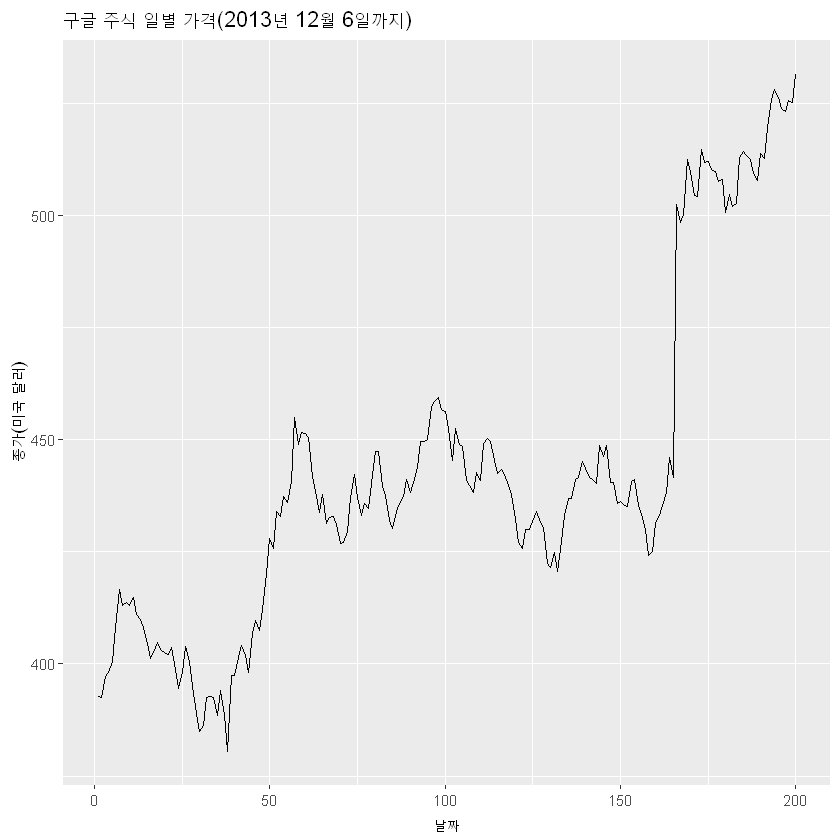

In [16]:
autoplot(goog200) +
  xlab("날짜") + ylab("종가(미국 달러)") +
  ggtitle("구글 주식 일별 가격(2013년 12월 6일까지)")


단순 기법(naïve method)으로 이 시계열을 예측하여 얻은 잔차를 그림 3.6에서 볼 수 있습니다. 양수의 큰 잔차는 166일에 예상 밖으로 가격이 뛴 결과입니다.

```Figure 3.6: 단순 기법을 이용한 구글 주식 예측에서 얻은 잔차```

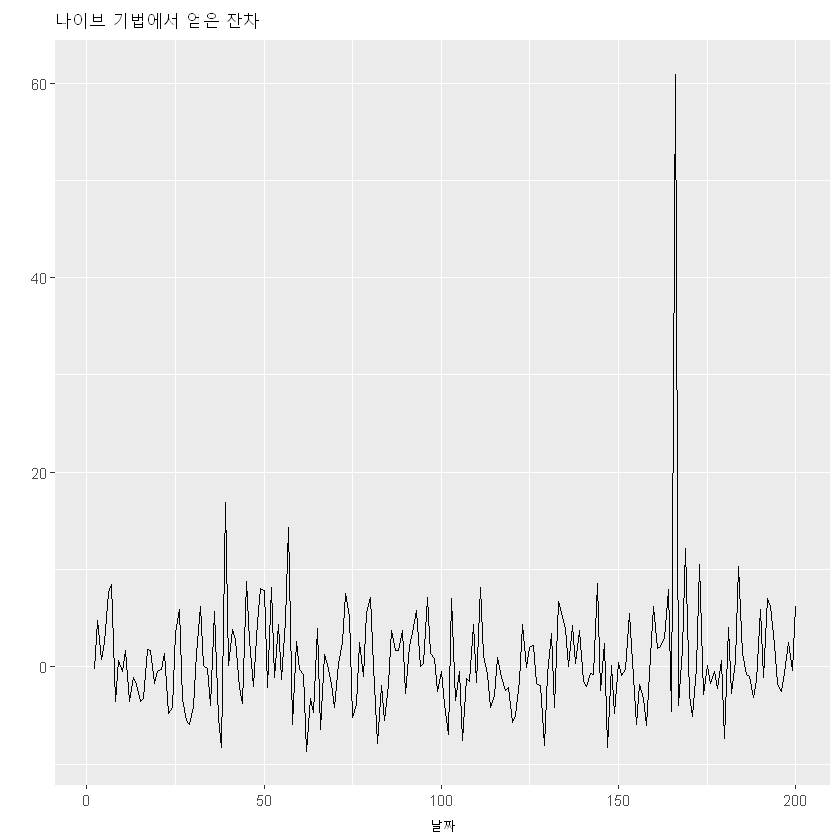

In [17]:
res <- residuals(naive(goog200))
autoplot(res) + xlab("날짜") + ylab("") +
  ggtitle("나이브 기법에서 얻은 잔차")

<br>

```Figure 3.7: 구글 주가에 단순 기법을 적용하여 얻은 잔차의 히스토그램. 오른쪽 꼬리는 정규 분포에 비해 너무 깁니다.```

Warning message:
"Removed 1 rows containing non-finite values (`stat_bin()`)."


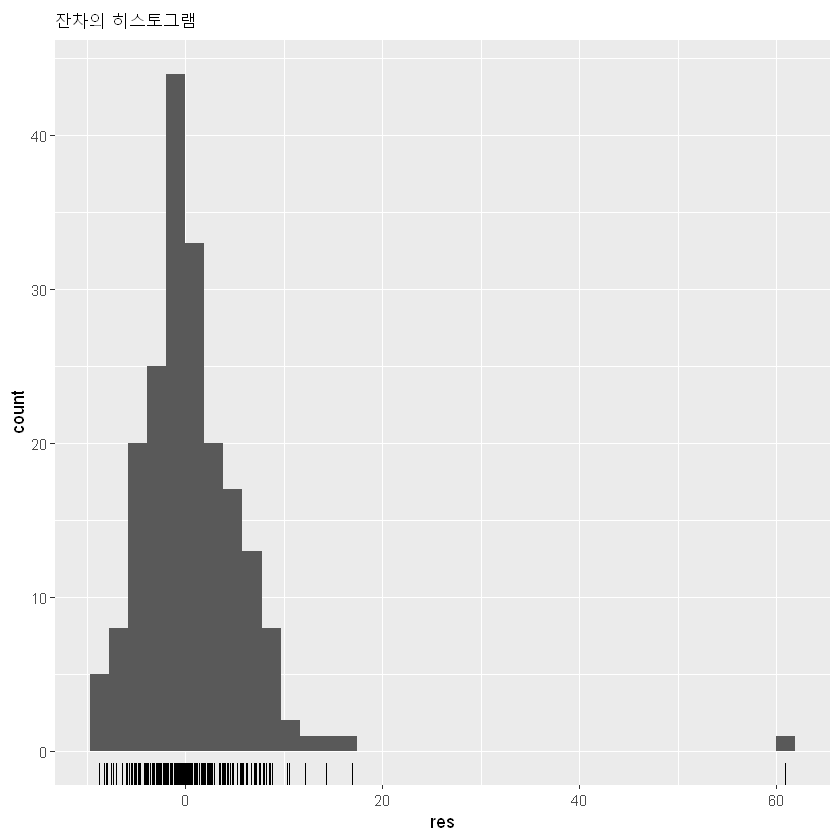

In [19]:
gghistogram(res) + ggtitle("잔차의 히스토그램")

<br>

```Figure 3.8: 구글 주가에 단순 기법을 적용하여 얻은 잔차의 ACF. 상관관계가 없다는 것은 예측값이 좋다는 것을 의미합니다.```

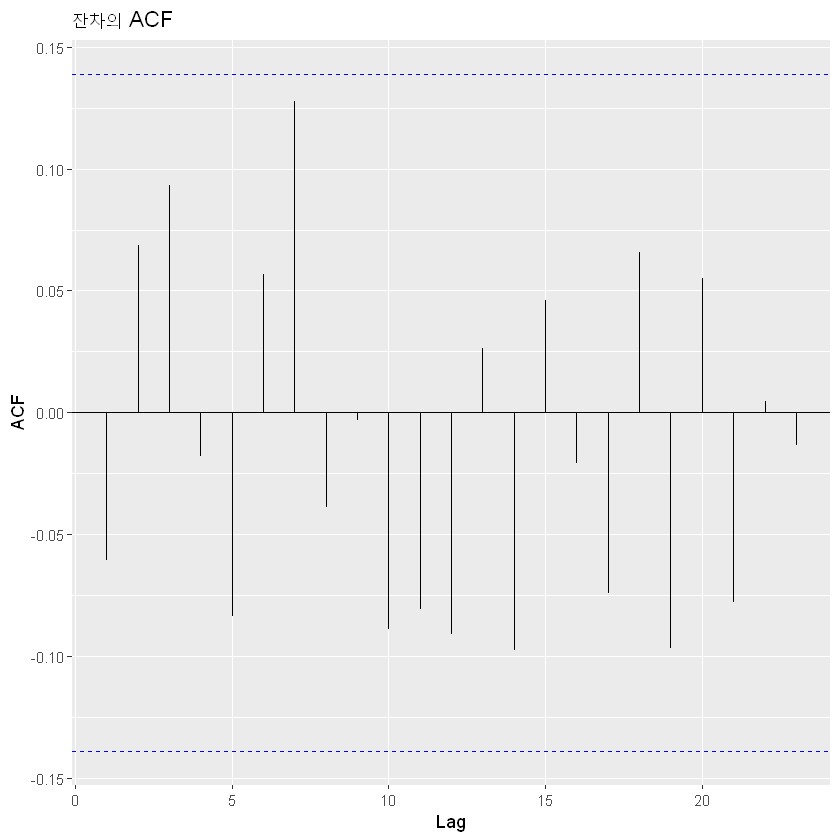

In [20]:
ggAcf(res) + ggtitle("잔차의 ACF")


이런 그래프는 사용할 수 있는 모든 정보를 고려한 것처럼 보이는 예측값을 단순 기법(naïve method)으로 구한 결과를 보여줍니다. **잔차(residual)의 평균은 0에 가깝고 잔차(residual)의 시계열에서 분명한 상관값이 없습니다.** 

**잔차의 시간 그래프(time plot)는 과거 데이터에 걸쳐 잔차(residual)의 분산이 1가지 이상치를 제외하고 거의 같은 양으로 유지되고 있다는 것을 보여주고 있습니다. 따라서 잔차(residual)의 분산을 상수로 둘 수 있습니다.**

**이것 역시 잔차의 히스토그램(histogram)에서 확인할 수 있습니다. 히스토그램에서 이상치를 무시하더라도 오른쪽 부분의 꼬리가 너무 긴 것 같고, 이것은 잔차(residual)가 정규 분포(normal distribution)를 따르지 않을 수 있다는 것을 시사합니다.**

결과적으로, 이 기법이 낸 예측값은 꽤 괜찮은 것 같습니다만, 정규 분포(normal distribution)를 가정하여 예측구간(prediction interval)을 얻은 것은 정확하지 않을 것입니다.

<br>

### 자기상관에 대한 포트맨토 검정

ACF 그래프를 보는 것에 더하여, $r_k$값을 각각 다루는 대신 $r_k$값의 전체 모음을 하나의 그룹으로 생각하여 자기 상관에 대한 더욱 형식적인 검정도 할 수 있습니다.

$r_k$가 $k$뒤처짐에 대한 자기상관(autocorrelation)이라는 것을 다시 떠올려봅시다. **ACF 그래프에서 각 뾰족한 막대가 필요한 제한 조건 안에 들어오는지 여부를 볼 때, 거짓 양성(false positive)으로 나올 작은 확률에 대해 암묵적으로 몇 가지 가설검증(hypothesis test)을 수행하고 있었습니다.** 이러한 검정을 충분하게 수행했을 때, 적어도 하나가 거짓 양성(false positive)으로 나올 확률이 큽니다. **그래서 사실은 그렇지 않더라도 잔차에 약간의 자기상관(autocorrelation)이 남아있다고 주장할 수도 있습니다.**

**이러한 문제를 해결하기 위해, 처음 $h$개의 자기상관(autocorrelation)이 백색잡음(white noise) 과정에서 얻은 것과 의미있게 다른 지 여부를 검정합니다.** 자기상관(autocorrelation) 값의 그룹에 대한 검정을 여러 가지 물품을 담고 있는 여행 가방이라는 프랑스 단어를 빌려 포트맨토(portmanteau) 검정이라고 부릅니다.

**박스-피어스(Box-Pierce)** 검정은 다음과 같은 통계에 기초하는 이런 종류의 검정입니다.

$$Q = T \sum_{k=1}^h r_k^2,$$

여기에서 $h$ 는 고려할 최대 시차(lagged value)이고 $T$는 관측값의 개수입니다. 각 $r_k$가 0에 가깝다면,  $Q$는 작을 것입니다. 몇몇 $r_k$값이 크다면(양수이거나 음수),  $Q$가 클 것입니다. 

**비-계절성 데이터에서 $h=10$를 계절성 데이터에서 $h=2m$을 사용하길 추천합니다.** 여기에서 $m$은 계절성의 주기(seasonal period)입니다. 

**하지만, $h$가 크면, 검정 결과가 좋지 않습니다. 그래서 이러한 값들이 $T/5$ 보다 크면, $h=T/5$ 를 사용하시길 바랍니다.**

<br>

**융-박스(Ljung-Box) 검정**은 관련된 (그리고 더 정확한) 검정입니다. 이 검정은 다음과 같은 내용에 기초합니다.

$$Q^* = T(T+2) \sum_{k=1}^h (T-k)^{-1}r_k^2.$$

다시 한번, **큰 $Q∗$값들은 자기상관(autocorrelation)값이 백색잡음(white noise) 시계열에서 온 것이 아니라는 것을 의미합니다.**

얼마나 커야 큰 것일까요? **자기상관(autocorrelation)이 백색잡음(white noise) 시계열에서 왔다면, $Q$와 $Q∗$모두 $(h−K)$자유도(degree of freedom)를 갖는 $χ^2$ 분포를 따를 것입니다.** 여기에서 $K$는 모델의 매개변수 개수입니다. 

**모델의 잔차에서 계산하는 대신 원본 데이터에서 이것을 계산한다면, $K=0$으로 둡시다.**

구글 주식 가격 예제에서, 단순 모델(naïve model)에서는 매개변수가 없으니, 이 경우에도 $K=0$로 둡니다.

<br>

#### `Box.test(x, lag, fitdf, type)`
* **`type` : `Lj` $\rightarrow$ Ljung-Box 검정**


#### p-value < 0.05 $\rightarrow$ 귀무가설 기각 $\rightarrow$ 잔차가 백색잡음 시계열과 다르다

In [26]:
# lag=h and fitdf=K
Box.test(res, lag=10, fitdf=0)


	Box-Pierce test

data:  res
X-squared = 10.611, df = 10, p-value = 0.3886


In [25]:
Box.test(res, lag=10, fitdf=0, type="Lj")


	Box-Ljung test

data:  res
X-squared = 11.031, df = 10, p-value = 0.3551


<br>

$Q$ 와 $Q∗$두 경우에 대해, 결과가 의미있지 않습니다 **(즉, p-값들이 상대적으로 큽니다). 그래서 잔차(residual)가 백색잡음(white noise) 시계열과 다르지 않다고 결론 내릴 수 있습니다.**

잔차(residual)를 확인하는 이러한 기법 모두 편리하게 사용할 수 있도록 하나의 R 함수 checkresiduals()에 들어있습니다. 이 함수로 시간 그래프(time plot), ACF 그래프, (비교 목적에서 정규 분포와 겹쳐서 그릴 수 있는) 잔차(residual)의 히스토그램(histogram) 등을 그릴 수 있고, 정확한 자유도(correct degree of freedom)로 융-박스(Ljung-Box) 검정을 할 수 있습니다.


	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



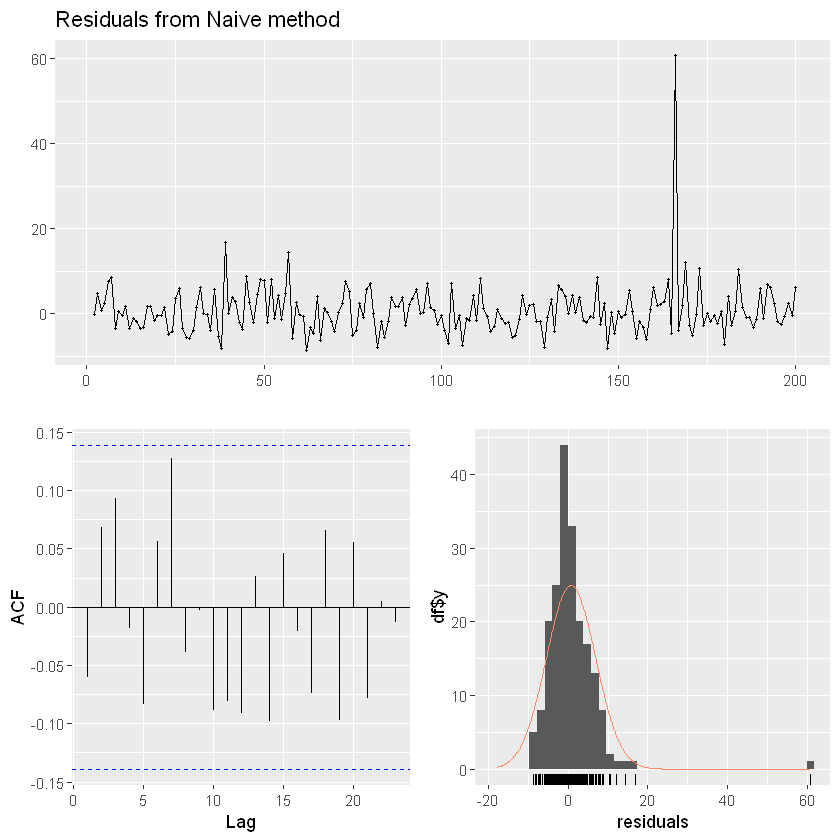

In [24]:
checkresiduals(naive(goog200))

<br>

## 03.04. 예측 정확도 평가

<br>

### 학습 데이터와 테스트 데이터

정답지를 사용하여 예측 정확도를 평가하는 것은 중요합니다. 결과적으로, 잔차(residual)의 크기는 참 예측 오차(forecast error)가 얼마나 클 지에 대해 믿을만한 지표가 아닙니다. 예측치의 정확도는 모델이 모델을 맞출 때 사용하지 않은 새로운 데이터를 얼마나 잘 맞추는 지 여부로만 결정할 수 있습니다.

모델을 선택할 때, 흔히 사용할 수 있는 데이터를 학습 데이터(training data)와 테스트 데이터(test data) 이렇게 두 부분으로 나눕니다. 여기에서 학습 데이터는 예측 기법의 어떠한 매개변수를 추정하는데 사용하고, 테스트 데이터는 정확도를 평가할 때 사용합니다. 테스트 데이터를 예측치를 결정할 때 사용하지 않기 때문에, 모델이 새로운 데이터에 대한 예측을 얼마나 잘 하는지 평가하는 믿을만한 지표를 제공합니다.

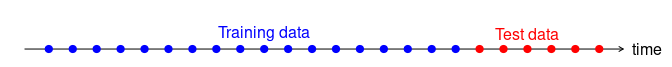

테스트 데이터(test data)의 크기는 표본이 얼마나 긴지와 얼마나 멀리 예측할 지에 따라 달라지긴 하지만 보통은 전체 표본의 약 20% 정도입니다. 테스트 데이터(test data)는 적어도 이상적으로는 필요한 최대 예측수평선(forecast horizon)만큼 커야합니다. 다음과 같은 사항을 주의해야합니다.

1. 학습 데이터를 잘 맞추는 모델이 반드시 예측을 잘 하지는 않을 수도 있습니다.
충분한 매개변수를 고려하는 모델을 이용하여 완벽하게 맞추는 모델을 항상 얻을 수 있습니다.
2. 모델을 데이터에 과도하게 맞춘 것은 데이터에서 조직적인 패턴을 찾아내지 못한 것만큼 나쁩니다.

이러한 데이터가 맞추는 작업에서 “빠지기” 때문에 테스트 데이터를 몇몇 참고 문헌에서는 “빠지는 데이터 모음(hold-out set)”으로 부릅니다. 다른 참조 문헌에서는 학습 데이터를 “표본 내 데이터(in-sample data)”로 테스트 데이터를 “표본 외 데이터(out-of-sample data)”라고 부릅니다. 이 책에서는 “학습 데이터(training data)”와 “테스트 데이터(test data)”로 부르겠습니다.

<br>

### 시계열 일부분을 다루기 위한 함수들

#### `window()` :  데이터를 학습 데이터(training data)와 테스트 데이터(test data)로 나누는 것 같이 시계열의 일부분을 추출
- 함수에서 필요한 시간값에 해당하는 시작이나 끝, 또는 둘 중에 하나, 아니면 둘 다 정할 수 있음

In [31]:
window(ausbeer, start=1995, end=2000)

,Qtr1,Qtr2,Qtr3,Qtr4
1995,426,408,416,520
1996,409,398,398,507
1997,432,398,406,526
1998,428,397,403,517
1999,435,383,424,521
2000,421,,,


<br>

#### `subset()` :  데이터의 일부를 추출할 때 인덱스를 사용
* 마지막 5년의 관측값

In [32]:
subset(ausbeer, start=length(ausbeer)-4*5)

,Qtr1,Qtr2,Qtr3,Qtr4
2005,,403,408,482
2006,438,386,405,491
2007,427,383,394,473
2008,420,390,410,488
2009,415,398,419,488
2010,414,374,,


* 모든 1분기 값

In [33]:
subset(ausbeer, quarter = 1)

A Time Series:
 [1] 284 262 272 261 286 295 279 294 313 331 335 353 393 383 387 410 419 458 465
[20] 500 510 486 515 503 513 548 493 475 453 464 459 481 474 467 485 464 443 433
[39] 449 426 409 432 428 435 421 451 428 435 435 416 438 427 420 415 414

<br>

### 예측 오차

**예측 “오차”는 관측값과 관측값의 예측치의 차이**입니다. 여기에서 “오차”는 실수(mistake)를 의미하는 것이 아니라 관측값에서 예측할 수 없는 부분을 의미합니다. 예측 오차(forecast error)를 다음과 같이 적을 수 있습니다.

$$e_{T+h} = y_{T+h} - \hat{y}_{T+h|T},$$

여기에서 학습(training) 데이터는 $\{y_1,\dots,y_T\}$ 로 주어지고 테스트(test) 데이터는 $\{y_{T+1},y_{T+2},\dots\}$로 주어집니다.

예측 오차는 두 가지 면에서 잔차와 다릅니다. 첫째, 잔차는 학습(training) 데이터에 대해 계산하지만, 예측 오차(forecast error)는 테스트(test) 데이터에 대해 계산합니다. 둘째, 잔차는 한-단계(one-step) 예측값에 기초하지만, 예측 오차는 여러-단계(multi-step) 예측값을 포함할 수 있습니다.

여러가지 방법으로 예측 오차를 요약하여 예측 정확도를 측정할 수 있습니다.

<br>

### 눈금에 의존하는 오차

예측 오차(forecast error)는 데이터와 같은 눈금 위에 있습니다. 따라서 $e_t$만 고려하는 정확도 측정값은 눈금(scale)에 의존하고 다른 단위(unit)를 포함하는 시계열을 비교하는데 사용할 수 없습니다.

절대 오차(absolute error) 또는 제곱 오차(squared error)를 고려하는 가장 흔하게 사용하는 두 가지 눈금 의존 측정값(scale-dependent measure)은 다음과 같습니다:

<br>

$$\begin{align*}
  \text{평균 절대 오차(Mean absolute error): MAE} & = \text{mean}(|e_{t}|),\\
  \text{제곱근 평균 제곱 오차(Root mean squared error): RMSE} & = \sqrt{\text{mean}(e_{t}^2)}.
\end{align*}$$

한 가지 시계열을 가지고 또는 같은 단위의 몇 가지 시계열 예측 기법을 비교할 때, MAE가 이해하기 쉬우면서 계산하기 쉬워서 인기가 있습니다. 

**MAE를 최소화하는 예측 기법은 예측값의 중앙값(median)을 내는데**, 
**RMSE를 최소화하는 예측 기법은 예측치의 평균을 냅니다.** 

결과적으로, 더 해석하기 어렵긴 하지만 RMSE도 널리 사용됩니다.

<br>

### 백분율 오차

백분율 오차(percentage error)는 $p_{t} = 100 e_{t}/y_{t}$ 이렇게 주어집니다. **백분율 오차(percentage error)는 단위와 관련 없다(unit-free)는 장점이 있어서 데이터 모음 사이의 예측 성능을 비교할 때 자주 사용됩니다.** 가장 흔하게 사용되는 측정값은 다음과 같습니다.

<br>

$$\text{평균 절대 백분율 오차(Mean absolute percentage error): MAPE} = \text{평균}(|p_{t}|).$$

**백분율 오차(percentage rror)에 기초하는 측정값은 관심 있는 기간 안에서 어떤 $t$에 대해 $y_t=0$이면 무한대가 되거나 정의되지 않는 단점과, $y_t$가 0에 가까울 수록 극한값을 갖는 단점이 있습니다.**

흔히 간과하는 백분율 오차의 또 다른 문제는 측정 단위가 의미있는 0을 갖는다고 가정한다는 것입니다.2 예를 들어, 온도에는 임의의 0점이 있기 때문에 화씨나 섭씨 눈금에 대해 온도의 정확도를 측정할 때 백분율 오차를 사용하는 것이 말이 안 됩니다.

**양수 오차보다 음수 오차 경우에 더 큰 가중치를 준다는 단점도 있습니다. M3 예측 대회에서 사용됐고 Armstrong (1978, p. 348)에서 제안한 “대칭적” MAPE(sMAPE)를 사용할 때 이러한 단점이 부각됩니다. sMAPE의 정의는 다음과 같습니다.**

$$\text{sMAPE} = \text{평균}\left(200|y_{t} - \hat{y}_{t}|/(y_{t}+\hat{y}_{t})\right).$$

<br>

### 눈금 조정된 오차

Hyndman & Koehler (2006) 에서 단위가 다른 시계열에 대해 예측 정확도를 비교할 때 사용할 백분율 오차(percentage error)의 대안으로 눈금 조정된 오차(scaled error)를 소개하였습니다. 어떤 단순한 예측 기법의 학습(training) MAE에 기초하여 오차의 눈금(scale)을 조정하는 방법을 제안했습니다.

비-계절성 시계열에 대해, 단순 예측값(naïve forecast)을 사용하여 눈금 조정된 오차(scaled error)를 정의하는 방법은 다음과 같습니다:

$$q_{j} = \frac{\displaystyle e_{j}}
    {\displaystyle\frac{1}{T-1}\sum_{t=2}^T |y_{t}-y_{t-1}|}.$$
    
**분모와 분자 둘 다 원본 데이터의 눈금에 대한 값을 포함하고 있기 때문에, $q_j$는 데이터의 눈금과 독립적입니다.**

**눈금이 조정된 오차(scaled error)는 학습 데이터에 대해 단순 예측값(naïve forecast)의 평균보다 좋은 예측치를 낼 때 1보다 작습니다. 반대로, 학습 데이터에 대한 예측치가 단순 예측값(naïve forecast)의 평균보다 나쁘면 1보다 큽니다.**

계절성 시계열에 대해, 눈금 조정된 오차(scaled error)는 계절성 단순 예측치(seasonal naïve forecast)를 이용하여 다음과 같이 정의할 수 있습니다.

$$q_{j} = \frac{\displaystyle e_{j}}
    {\displaystyle\frac{1}{T-m}\sum_{t=m+1}^T |y_{t}-y_{t-m}|}.$$

눈금 조정된 평균 절대 오차(mean absolute scaled error)는 단순히 다음과 같습니다.

$$\text{MASE} = \text{평균}(|q_{j}|).$$

<br>

### 예제

In [34]:
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
beerfit1 <- meanf(beer2,h=10)
beerfit2 <- rwf(beer2,h=10)
beerfit3 <- snaive(beer2,h=10)

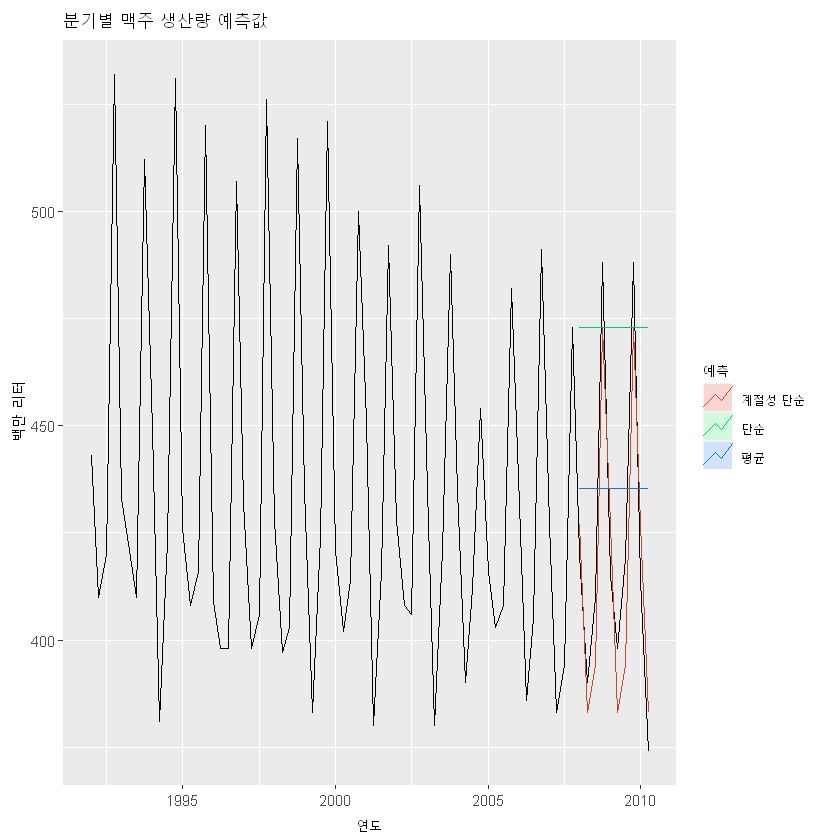

In [35]:
autoplot(window(ausbeer, start=1992)) +
  autolayer(beerfit1, series="평균", PI=FALSE) +
  autolayer(beerfit2, series="단순", PI=FALSE) +
  autolayer(beerfit3, series="계절성 단순", PI=FALSE) +
  xlab("연도") + ylab("백만 리터") +
  ggtitle("분기별 맥주 생산량 예측값")  +
  guides(colour=guide_legend(title="예측"))

In [39]:
library(forecast)

beer3 <- window(ausbeer, start=2008)
forecast::accuracy(beerfit1, beer3)
forecast::accuracy(beerfit2, beer3)
forecast::accuracy(beerfit3, beer3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.000,43.62858,35.23438,-0.9365102,7.886776,2.463942,-0.10915105,NA
Test set,-13.775,38.44724,34.82500,-3.9698659,8.283390,2.435315,-0.06905715,0.801254


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4761905,65.31511,54.73016,-0.9162496,12.16415,3.827284,-0.24098292,NA
Test set,-51.4000000,62.69290,57.40000,-12.9549160,14.18442,4.013986,-0.06905715,1.254009


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.133333,16.78193,14.3,-0.5537713,3.313685,1.0000000,-0.2876333,NA
Test set,5.200000,14.31084,13.4,1.1475536,3.168503,0.9370629,0.1318407,0.298728


<br>

그래프에서 보면 계절성 단순 기법(seasonal naïve method)이 이러한 데이터에 대해 가장 좋은 것을 알 수 있습니다. 더 좋게 만들 수 있긴 하지만, 나중에 살펴보겠습니다. 때때로, 다른 정확도 값은 어떤 예측 기법이 가장 좋은 것인지에 대한 결과가 서로 다릅니다. 하지만, 이 경우에는, 모든 결과가 이 데이터 모음에서 계절성 단순 기법이 이러한 3개의 기법 중에서 가장 좋다고 알려줍니다.

비-계절성 예제를 다루기 위해, 구글 주가 데이터를 고려해봅시다. 다음의 그래프는 마지막 값이 2013년 12월 6일인 200개의 관측값과 3개의 다른 기법에서 다음 40일 예측치를 얻은 것을 나타냅니다.

<br>

In [40]:
googfc1 <- meanf(goog200, h=40)
googfc2 <- rwf(goog200, h=40)
googfc3 <- rwf(goog200, drift=TRUE, h=40)

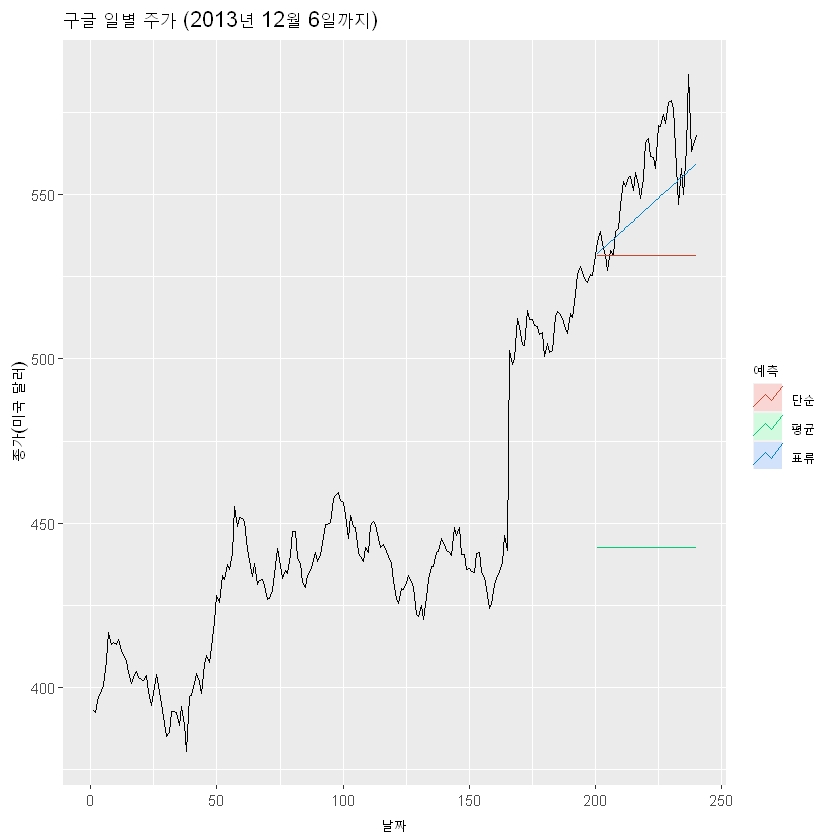

In [41]:
autoplot(subset(goog, end = 240)) +
  forecast::autolayer(googfc1, PI=FALSE, series="평균") +
  forecast::autolayer(googfc2, PI=FALSE, series="단순") +
  forecast::autolayer(googfc3, PI=FALSE, series="표류") +
  xlab("날짜") + ylab("종가(미국 달러)") +
  ggtitle("구글 일별 주가 (2013년 12월 6일까지)") +
  guides(colour=guide_legend(title="예측"))

In [42]:
googtest <- window(goog, start=201, end=240)
forecast::accuracy(googfc1, googtest)
forecast::accuracy(googfc2, googtest)
forecast::accuracy(googfc3, googtest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.296286e-15,36.91961,26.86941,-0.6596884,5.95376,7.182995,0.9668981,NA
Test set,1.132697e+02,114.21375,113.26971,20.3222979,20.32230,30.280376,0.8104340,13.92142


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.6967249,6.208148,3.740697,0.1426616,0.8437137,1.000000,-0.06038617,NA
Test set,24.3677328,28.434837,24.593517,4.3171356,4.3599811,6.574582,0.81043397,3.451903


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.998536e-15,6.168928,3.824406,-0.01570676,0.8630093,1.022378,-0.06038617,NA
Test set,1.008487e+01,14.077291,11.667241,1.77566103,2.0700918,3.119002,0.64732736,1.709275


<br>

### 시계열 교차 검증

시계열 교차 검증(cross-validation)은 데이터를 더 세련되게 학습/테스트하는 방법입니다. 이 과정에서, 각각이 한 가지 관측으로 구성된 테스트(test) 데이터가 있습니다. 대응되는 학습(training) 데이터는 테스트(test) 데이터을 구성하는 관측에 앞서(prior) 일어난 관측만으로 구성됩니다. 그래서 예측치를 구성할 때 미래 측정치를 전혀 사용하지 않습니다. 작은 학습 데이터에서 신뢰할만한 예측을 얻을 수 없기 때문에, 초반부의 관측값을 테스트 데이터로 고려하지 않습니다.

다음의 도표는 학습 데이터와 테스트 데이터를 연속하여 나타낸 것입니다. 여기에서 파란 관측값은 학습 데이터, 빨간 관측값은 테스트 데이터입니다.

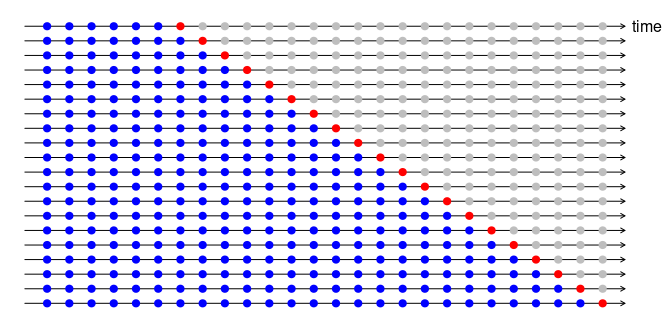

예측 정확도(forecast accuracy)는 테스트(test) 데이터에 대한 평균으로 계산합니다. 예측하는 원점(origin)을 시간에 따라 앞으로 굴리기 때문에 때때로 이 과정을 “예측 원점 굴리기에 대한 평가(evaluation on a rolling forecasting origin)”라고도 합니다.

**시계열 예측에서, 한 단계 예측치는 여러 단계 예측치와 그렇게 관련이 있지 않을 수도 있습니다. 이런 경우에는, 예측 원점 굴리기(rolling forecasting origin)에 기초한 교차 검증(cross-validation) 과정을 여러 단계 오차(multi-step forecast)를 사용할 수 있도록 변형할 수 있습니다.** 4단계 앞 예측치를 잘 내는 모델에 관심이 있다고 합시다. 그러면 대응되는 그래프는 아래와 같습니다.

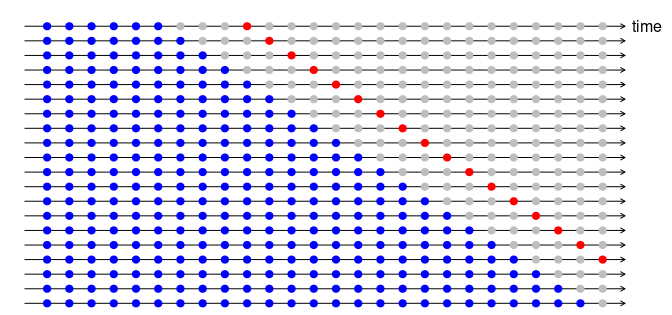

시계열 교차 검증(cross-validation)은 **`tsCV()`** 함수로 구현합니다. 다음의 예제에서, 잔차 RMSE와 시계열 교차 검증(cross-validation)을 통해 얻은 RMSE를 비교합니다.

In [43]:
e <- tsCV(goog200, rwf, drift=TRUE, h=1)
sqrt(mean(e^2, na.rm=TRUE))

[1] 6.233245

In [44]:
sqrt(mean(residuals(rwf(goog200, drift=TRUE))^2, na.rm=TRUE))

[1] 6.168928

예측한 것처럼, 대응되는 “예측값(forecast)”이 참 예측치가 되는 것 대신에, 전체 데이터 모음을 맞추는 모델이 될 수록 잔차에서 얻은 RMSE가 더 작습니다.

가장 뛰어난 예측 모델을 선택하는 좋은 방법은 시계열 교차 검증(cross-validation)으로 RMSE를 계산하여 가장 작은 모델을 찾는 것입니다.

<br>

### 예제: tsCV() 사용하기

아래의 코드는 MSE를 예측 오차로 사용하고 tsCV()로 1단계부터 8단계 naive (단순; naïve) 예측값의 예측 성능을 계산합니다. 그래프는 자연스럽게 예측할 수 있는 것과 같이, 예측 오차(forecast error)가 예측 범위(forecast horizon)에 따라 증가하는 것을 나타냅니다.

In [46]:
e <- tsCV(goog200, forecastfunction=naive, h=8)

* MSE 값을 계산하고 결측값을 제거합니다

In [47]:
mse <- colMeans(e^2, na.rm = T)

* MSE 값을 예측 범위에 대해 그래프로 나타냅니다.

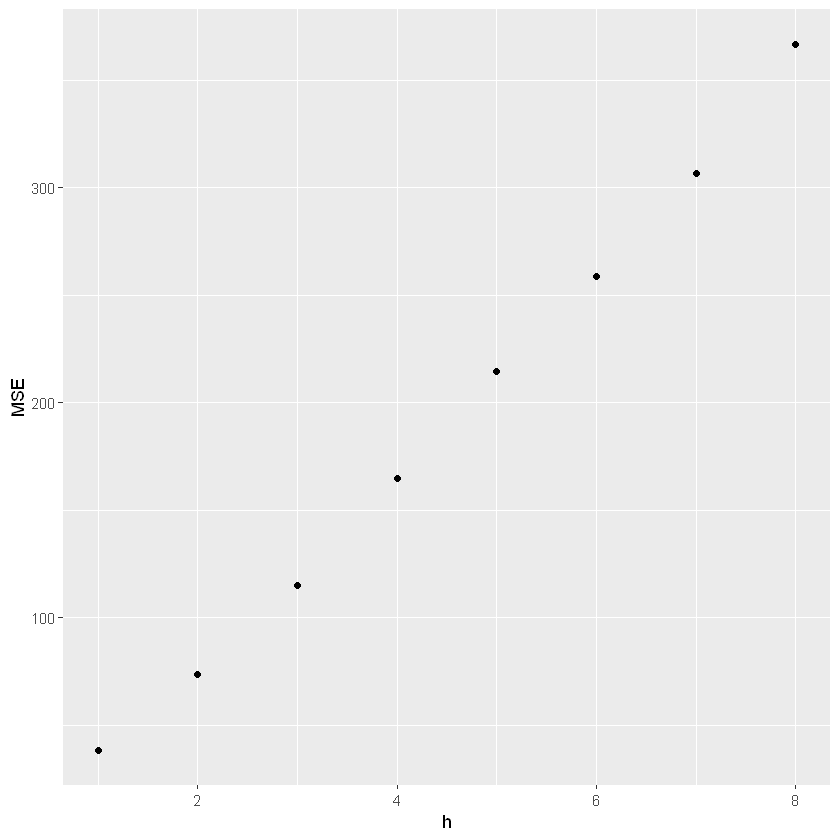

In [48]:
data.frame(h = 1:8, MSE = mse) %>%
  ggplot(aes(x = h, y = MSE)) + geom_point()

<br>

## 03.05. 예측 구간

예측 구간(prediction interval)은 특정한 확률로 $y_t$가 들어갈 구간을 의미합니다. 예를 들어, 예측 오차(forecast error)가 상관관계(correlation)가 없고 정규 분포(normal distribution)를 따른다고 가정하면, h-단계 예측값에 대한 95% 예측 구간은 다음과 같습니다.

$$\hat{y}_{T+h|T} \pm 1.96 \hat\sigma_h,$$

여기에서 $\hat\sigma_h$는 h-단계 예측 분포(forecast distribution)의 표준 편차의 추정값입니다. 더 일반적으로, 예측 구간(prediction interval)은 다음과 같이 적을 수 있습니다.

$$\hat{y}_{T+h|T} \pm c \hat\sigma_h$$

여기에서 $c$는 포함하려는 확률값에 따라 달라집니다. 어떤 임의의 확률도 사용할 수 있겠지만, 이 책에서는 주로 80% 구간과 95% 구간을 계산하겠습니다. 다음의 표는 정규 분포를 따르는 예측 오차를 가정하고, 포함하려는 확률값의 범위에 따라 주어지는 $k$ 값을 나타냅니다.

예측구간(prediction interval)의 값은 예측값의 불확실성(uncertainty)을 나타냅니다. 점예측값(point forecast)만 낸다면, 예측값이 얼마나 정확한지 나타낼 방법이 없습니다. 하지만, 예측 구간과 함께 낸다면, 각 예측값이 불확실성(uncertainty)과 얼마나 관련이 있는지 알 수 있게 됩니다. 이러한 이유에서, 예측 구간(prediction interval) 없이 나타내는 점 예측값(point forecast)은 거의 의미가 없다고 할 수 있습니다.

<br>

### 한-단계 예측 구간

**한-단계(one-step) 앞을 예측할 때, 예측 분포(forecast distribution)의 표준 편차는 잔차(residual)의 표준 편차와 거의 같습니다.** (사실, 단순 기법-naïve method-의 경우처럼 추정할 매개변수가 없으면 두 표준 편차는 같습니다. 추정할 매개변수를 포함하는 예측 기법에 대해, 예측 분포의 표준 편차와 잔차의 표준 편차의 차이가 종종 무시되기는 하지만, 예측 분포의 표준 편차는 잔차의 표준 편차보다 살짝 큽니다.)

예를 들어, (그림 3.5 에 나타낸) 구글 주가 데이터 goog200에 대한 단순 예측(naïve method)을 다뤄봅시다. 관측한 시계열의 마지막 값은 531.48입니다. 따라서 DJI의 다음값 예측은 531.48 입니다. 단순 기법(naïve method)에서 얻은 잔차의 표준 편차는 6.21입니다. 따라서, 다음 DJI 값에 대한 95% 예측구간(prediction interval)은 다음과 같습니다.

$$531.48 \pm 1.96(6.21) = [519.3, 543.6].$$

비슷하게, 80% 예측구간(prediction interval)은 다음과 같이 주어집니다.


$$531.48 \pm 1.28(6.21) = [523.5, 539.4].$$

<br>

### 여러-단계 예측 구간

**예측 구간의 공통적인 특징은 예측 범위(forecast horizon)이 증가할 수록 구간이 길어진다는 것입니다. 우리가 더 멀리 예측할 수록, 예측에 더 큰 불확실성(uncertainty)이 개입되고, 따라서 예측구간(prediction interval)이 더 넓어집니다.**

**즉, 보통 $σ_h$는 $h$ 에 따라 증가합니다(이러한 특징을 가지고 있지 않은 비-선형 예측 기법도 있습니다만).**

예측 구간을 생성하기 위해서는, $σ_h$의 추정값이 필요합니다. 이미 이야기한 것처럼, 한-단계 예측값에 대해, 잔차(residual)의 표준 편차가 예측값의 표준편차($σ_1$)의 좋은 추정치가 될 수 있습니다. **여러-단계(multi-step) 예측치에 대해서는, 더 복잡한 계산이 필요합니다. 이러한 계산 과정에서 잔차(residual)에 상관관계(correlation)가 없다고 가정합니다.** 보통은 이러한 계산을 표준 예측 소프트웨어에게 맡기고 (소프트웨어를 작성하는 사람이 아니라면!) 예측하는 사람은 이런 것으로 고민할 필요가 없습니다.

변환을 사용하면, 예측구간(prediction interval)은 변환된 눈금으로 계산되어야 하고, 원래의 눈금에서 예측구간(prediction interval)을 내기 위해 구간의 양끝점이 역변환되어야 합니다. 점예측(point forecast) 주변으로 더이상 대칭성(symmetry)을 유지할 수는 없지만 이러한 방식으로 예측 구간의 범위를 보존합니다.

<br>

### 벤치마크 기법

4가지 벤치마크(benchmark) 기법에 대해, **상관관계(correlation)가 없는 잔차를 가정하고, 예측값의 표준 편차를 수학적으로 유도할 수 있습니다.**

$\hat{\sigma}_h$가 h-단계 예측 분포(forecast distribution)가 표준 편차를 나타내고, $\hat{\sigma}$가 잔차의 표준 편차라면, 다음과 같은 식을 사용할 수 있습니다.

1. **평균 예측값 : $\hat\sigma_h = \hat\sigma\sqrt{1 + 1/T}$** 

2. **단순 예측값 : $\hat\sigma_h = \hat\sigma\sqrt{h}$**

3. **계절성 단순 예측값 : $\hat\sigma_h = \hat\sigma\sqrt{k+1}$ , 여기에서 $k$는 $(h−1)/m$의 정수 부분이고 $m$은 계절성 주기(seasonal period)입니다.**

4. **표류 예측값 : $\hat\sigma_h = \hat\sigma\sqrt{h(1+h/T)}$**

$h=1$이고 $T$가 클 때, 위의 모든 값은 같은 근사값인 $\hat{\sigma}$가 됩니다.

여러분이 벤치마크 예측 기법을 사용할 때 예측 구간이 계산될 것입니다. 한 가지 예로, 구글(Google) 주식 가격 예제에 단순 기법(naïve method)을 사용했을 때 결과를 살펴봅시다.

In [49]:
naive(goog200)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
201       531.4783 523.5222 539.4343 519.3105 543.6460
202       531.4783 520.2267 542.7298 514.2705 548.6861
203       531.4783 517.6980 545.2586 510.4031 552.5534
204       531.4783 515.5661 547.3904 507.1428 555.8138
205       531.4783 513.6880 549.2686 504.2704 558.6862
206       531.4783 511.9900 550.9666 501.6735 561.2830
207       531.4783 510.4285 552.5280 499.2854 563.6711
208       531.4783 508.9751 553.9814 497.0627 565.8939
209       531.4783 507.6101 555.3465 494.9750 567.9815
210       531.4783 506.3190 556.6375 493.0005 569.9561

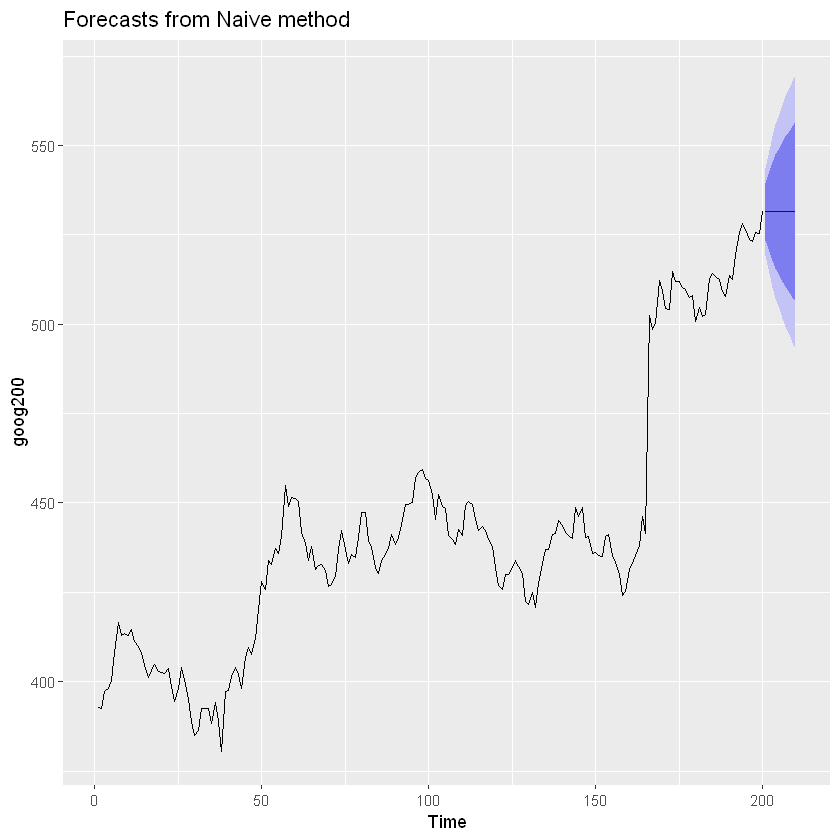

In [50]:
autoplot(naive(goog200))

<br>

### 붓스트랩 잔차에서 얻은 예측 구간

예측오차(forecast error)에 대해 정규 분포를 가정하는 것이 적절하지 않을 때는 한 가지 대안으로 붓스트랩(bootstrap; 표본 안에서 다시 뽑기)을 사용할 수 있습니다. 붓스트랩 기법에서는 예측 오차(forecast error)에 상관관계(correlation)가 없다는 것만 가정합니다.

예측오차(forecast error)는 다음과 같이 $e_t = y_t - \hat{y}_{t|t-1}$로 정의됩니다. 이것을 다음과 같이 다시 쓸 수 있습니다.

$$y_t = \hat{y}_{t|t-1} + e_t.$$

따라서 아래의 식을 이용해서 시계열의 다음 관측값을 모사할 수 있습니다.

$$y_{T+1} = \hat{y}_{T+1|T} + e_{T+1}$$

여기에서 $\hat{y}_{T+1|T}$ 는 한-단계(one-step) 예측이고 $e_{T+1}$ 는 아직 모르는 미래 오차입니다. 미래 오차가 과거 오차와 비슷할 것이라고 가정하면, $e_{T+1}$ 을 과거에 확인한 오차(예를 들면, 잔차)에서 뽑는 것으로 바꿀 수 있습니다. 새로 모사한 관측을 데이터에 추가하면, 아래와 같은 식을 얻기 위해 위와 같은 과정을 반복할 수 있습니다.

$$y_{T+2} = \hat{y}_{T+2|T+1} + e_{T+2}$$

여기에서 $e_{T+2}$는 잔차값에서 뽑은 또 다른 값입니다. 이 방법을 계속하면, 다루는 시계열에 대한 미래 값 전체를 모사할 수 있습니다.

이 작업을 반복하면, 여러 가지 가능한 미래값을 얻게됩니다. 그러면 각 예측수평선(forecast horizon)에 대해 백분율을 계산하여 예측구간(prediction interval)을 얻을 수 있습니다. 이 결과를 **붓스트랩된(bootstrapped) 예측구간이라고 부릅니다.**

“붓스트랩”이라는 이름은 신발끈을 당겨 우리 자신을 끌어 당긴다는 것에서 유래합니다. 왜냐하면, 이 과정은 과거 데이터만 사용해서 미래의 불확실성을 살필 수 있도록 하기 때문입니다.

In [51]:
naive(goog200, bootstrap=TRUE)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
201       531.4783 525.9331 537.0061 523.2307 541.3329
202       531.4783 523.2940 539.5627 520.0567 546.2446
203       531.4783 521.1652 541.4753 516.8796 550.0241
204       531.4783 519.3720 543.2277 514.3432 553.4717
205       531.4783 517.5047 544.7275 511.8249 558.6432
206       531.4783 516.2141 545.7641 509.5257 570.4653
207       531.4783 514.6887 546.6851 507.6034 576.9850
208       531.4783 513.2293 548.3818 505.6334 582.3869
209       531.4783 512.0818 549.4965 503.7937 583.2421
210       531.4783 510.9610 551.1376 502.0426 583.5769

<br>

### 변환을 이용하는 예측구간

어떤 수학적인 변환을 사용했다면, 변환된 눈금으로 예측 구간을 계산해야 하고, 원래의 눈금에서의 예측 구간으로 표현하기 위해 마지막 과정에서 역-변환해야 합니다. 이 방법 때문에 점 예측값(point forecast) 주변에서 예측구간이 더이상 대칭이 아닌 형태로 나타나게 되지만, 이 방법은 예측구간이 다루는 확률 범위를 보존합니다.|

<br>

## 03.06. R의 `forecast`패키지

이 책은 R의 forecast 패키지에 있는 기능을 (fpp2 패키지를 부를 때 forecast 패키지도 자동으로 부릅니다) 이용합니다. 이 부록은 간략하게 이 패키지의 몇 가지 기능을 요약합니다. 각 함수를 더 알고 싶거나 이러한 함수를 사용하는 예제를 보려면 도움말 파일을 참조하시길 바랍니다.

<br>

### `forecast`객체를 결과로 내는 함수:

`meanf()`, `naive()`, `snaive()`, `rwf()`를 포함하는 많은 함수는 `forecast` 객체의 형식으로 출력을 냅니다(즉, `forecast` 클래스의 객체). 이렇게 하여 (`autoplot()` 같은) 다른 함수가 다양한 예측 모델에 걸쳐 일관성 있게 작동하도록 합니다.

클래스 `forecast`의 객체는 예측 기법, 사용한 데이터, 얻은 점 예측치, 예측구간, 잔차(residual)와 적합값(fitted value)에 관한 정보를 담고 있습니다. `autoplot()`, `summary()`, `print()`를 포함하는 이러한 객체로 작업할 수 있도록 디자인한 몇 가지 함수가 있습니다.

<br>

* **`meanf()`**
* **`naive()`**, **`snaive()`**
* **`rwf()`**
* **`croston()`**
* **`stlf()`**
* **`ses()`**
* **`holt()`**, **`hw()`**
* **`splinef()`**
* **`thetaf()`**
* **`forecast()`**